In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
os.chdir('data')

In [3]:
[file for file in os.listdir() if(file.endswith('.csv'))]

['Median Incomes.csv',
 'Median Monthly Rent.csv',
 'Home Ownership.csv',
 'Total Population.csv',
 'Uninsured.csv',
 'Unemployment Rate.csv',
 'Severe Rent Burden.csv',
 'Educational Attainment.csv',
 'Overcrowded Rental Housing.csv',
 'SNAP (Food Stamps).csv',
 'Household Income.csv',
 'Public Assistance.csv',
 'Employment Population Ratio.csv',
 'Total Population by Race_Ethnicity.csv']

In [4]:
dfs = {}
for file in os.listdir():
    if (file.endswith('.csv')):
        key = file[:-4].replace(' ', '_').lower()
        #print(key)
        dfs[key] = pd.read_csv(file, skiprows=4, encoding='utf8', low_memory=False)
        #print(f"{key} - {sorted(set(dfs[key]['TimeFrame'].tolist()))}")

In [ ]:
dfs.keys()

In [ ]:
for key in dfs.keys():
    print(f'{key} - {dfs[key].columns.tolist()}')
    print(sorted(dfs[key]['TimeFrame'].value_counts().index))

In [ ]:
for key in dfs.keys():
    if('Number' in list(set(dfs[key]['DataFormat'].tolist())) ):
        print(key)
        

In [5]:
standard = {}
extra = {}
for key in dfs.keys():
    if(dfs[key].columns[1] == 'TimeFrame' and key != 'public_assistance'):
        print(f'{key} - {dfs[key].columns.tolist()}')
        standard[key] = dfs[key]
        if(key == 'total_population'):
            standard[key] = dfs[key][~dfs[key].Fips.str.contains('uhf')]
            standard[key].Fips = standard[key].Fips.astype(int)
        if(key == 'median_monthly_rent'):
            standard[key]['DataFormat'] = 'Number'
    else:
        extra[key] = dfs[key]
    #print(dfs[key].head(2))

median_monthly_rent - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
home_ownership - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
total_population - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
unemployment_rate - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
severe_rent_burden - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
overcrowded_rental_housing - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
employment_population_ratio - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']


/Users/tavares/opt/anaconda3/envs/PythonML/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [6]:
print('standard: ', list(standard.keys()))
print('')
print('extra: ', list(extra.keys()))

standard:  ['median_monthly_rent', 'home_ownership', 'total_population', 'unemployment_rate', 'severe_rent_burden', 'overcrowded_rental_housing', 'employment_population_ratio']

extra:  ['median_incomes', 'uninsured', 'educational_attainment', 'snap_(food_stamps)', 'household_income', 'public_assistance', 'total_population_by_race_ethnicity']


In [7]:
df = standard['median_monthly_rent'][['TimeFrame','Fips','Location']]

In [8]:
df = df.merge(standard['total_population'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Population'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [9]:
df = df.merge(standard['median_monthly_rent'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Rent'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [10]:
df = df.merge(standard['severe_rent_burden'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Rent_Burden'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)
df = df.merge(standard['overcrowded_rental_housing'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Overcrowded'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [11]:
df = df.merge(standard['home_ownership'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Owner'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [12]:
df = df.merge(standard['employment_population_ratio'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Employment_Ratio'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)
df = df.merge(standard['unemployment_rate'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Unemployment'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [13]:
print(df.shape)
df.head()

(910, 10)


,TimeFrame,Fips,Location,Population,Rent,Rent_Burden,Overcrowded,Owner,Employment_Ratio,Unemployment
0,2005,101,Battery Park/Tribeca,51150.45963,2191.21645,0.17644,0.03794,0.26053,0.751,0.033
1,2005,102,Greenwich Village,75508.54037,2191.21645,0.17644,0.03794,0.26053,0.751,0.033
2,2005,103,Lower East Side,145556.00000,817.19484,0.23809,0.08153,0.13708,0.564,0.088
3,2005,104,Chelsea/Clinton,88754.39184,1781.33008,0.19318,0.04339,0.20554,0.677,0.066
4,2005,105,Midtown Business District,44420.60816,1781.33008,0.19318,0.04339,0.20554,0.677,0.066


In [14]:
for key in extra:
    print(f'{key} - {extra[key].columns.tolist()}')

median_incomes - ['Location', 'Household Type', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
uninsured - ['Location', 'Age Group', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
educational_attainment - ['Location', 'Education Level', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
snap_(food_stamps) - ['Location', 'Recipient', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
household_income - ['Location', 'Income Level', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
public_assistance - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
total_population_by_race_ethnicity - ['Location', 'Race/Ethnicity', 'TimeFrame', 'DataFormat', 'Data', 'Fips']


In [15]:
median_incomes = extra['median_incomes'][extra['median_incomes']['Household Type']=='All Households']
median_incomes = median_incomes[['TimeFrame','Fips','DataFormat','Data']].set_index(['TimeFrame','Fips','DataFormat']).unstack()
median_incomes.columns = ['Median_Income']
#median_incomes['Type'] = 'median_income'
median_incomes = median_incomes.reset_index()
print(median_incomes.shape)
median_incomes.head()
df = df.merge(median_incomes,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

(910, 3)


In [16]:
uninsured = extra['uninsured'][extra['uninsured']['Age Group']=='All Ages']
uninsured = uninsured[['TimeFrame','Fips','DataFormat','Data']].set_index(['TimeFrame','Fips','DataFormat']).unstack()
uninsured.columns = ['Uninsured_No','Uninsured_Pct']
#uninsured['Type'] = 'uninsured'
uninsured = uninsured.reset_index()
print(uninsured.shape)
uninsured.head()
df = df.merge(uninsured,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

(715, 4)


In [17]:
education = extra['educational_attainment']
education = education[['TimeFrame','Fips','Education Level','DataFormat','Data']]
education = education[education['Education Level'].str.contains('Bachelor')]
education = education.set_index(['TimeFrame','Fips','Education Level','DataFormat']).unstack()
education.columns = ['Education_No','Education_Pct']
#education['Type'] = 'education'
education = education.reset_index().rename(columns={'Education Level': 'Education_Level'})
print(education.shape)
education.head()
df = df.merge(education,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

(845, 5)


In [18]:
snap = extra['snap_(food_stamps)'][extra['snap_(food_stamps)']['Recipient']=='Households']
snap = snap[['TimeFrame','Fips','DataFormat','Data']].set_index(['TimeFrame','Fips','DataFormat']).unstack()
snap.columns = ['Snap_No','Snap_Pct']
#snap['Type'] = 'snap'
snap = snap.reset_index()
print(snap.shape)
snap.head()
df = df.merge(snap,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

(715, 4)


In [ ]:
#df.to_csv('../data.csv')

In [ ]:
households = extra['household_income']
households = households[['TimeFrame','Fips','Income Level','DataFormat','Data']].set_index(['TimeFrame','Fips','Income Level','DataFormat']).unstack()
households.columns = ['Income_No','Income_Pct']
#households['Type'] = 'household_income'
households = households.reset_index().rename(columns={'Income Level': 'Income_Level'})
print(households.shape)
households.head()
df = df.merge(households,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [ ]:
public_assistance = extra['public_assistance']
public_assistance = public_assistance[['TimeFrame','Fips','DataFormat','Data']].set_index(['TimeFrame','Fips','DataFormat']).unstack()
public_assistance.columns = ['PA_No','PA_Pct']
#public_assistance['Type'] = 'public_assistance'
public_assistance = public_assistance.reset_index()
print(public_assistance.shape)
public_assistance.head()
df = df.merge(public_assistance,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [ ]:
pop_by_race = extra['total_population_by_race_ethnicity']
pop_by_race = pop_by_race[['TimeFrame','Fips','Race/Ethnicity','DataFormat','Data']].set_index(['TimeFrame','Fips','Race/Ethnicity','DataFormat']).unstack()
pop_by_race.columns = ['Race_No','Race_Pct']
#pop_by_race['Type'] = 'population_by_race'
pop_by_race = pop_by_race.reset_index().rename(columns={'Race/Ethnicity': 'Race'})
print(pop_by_race.shape)
pop_by_race.head()
df = df.merge(pop_by_race,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [19]:
df.shape

(910, 18)

In [20]:
sorted(pop_by_race['TimeFrame'].value_counts().index)

NameError: name 'pop_by_race' is not defined

In [21]:
print(df.shape)
print(sorted(df['TimeFrame'].value_counts().index))
print(df.columns.tolist())
df.head(10)

(910, 18)
[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
['TimeFrame', 'Fips', 'Location', 'Population', 'Rent', 'Rent_Burden', 'Overcrowded', 'Owner', 'Employment_Ratio', 'Unemployment', 'Median_Income', 'Uninsured_No', 'Uninsured_Pct', 'Education_Level', 'Education_No', 'Education_Pct', 'Snap_No', 'Snap_Pct']


,TimeFrame,Fips,Location,Population,Rent,Rent_Burden,Overcrowded,Owner,Employment_Ratio,Unemployment,Median_Income,Uninsured_No,Uninsured_Pct,Education_Level,Education_No,Education_Pct,Snap_No,Snap_Pct
0,2005,101,Battery Park/Tribeca,51150.45963,2191.21645,0.17644,0.03794,0.26053,0.751,0.033,116703.49427,NaN,NaN,NaN,NaN,NaN,1198.0,0.04744
1,2005,102,Greenwich Village,75508.54037,2191.21645,0.17644,0.03794,0.26053,0.751,0.033,116703.49427,NaN,NaN,NaN,NaN,NaN,2525.0,0.05822
2,2005,103,Lower East Side,145556.00000,817.19484,0.23809,0.08153,0.13708,0.564,0.088,40241.54525,NaN,NaN,NaN,NaN,NaN,14828.0,0.21802
3,2005,104,Chelsea/Clinton,88754.39184,1781.33008,0.19318,0.04339,0.20554,0.677,0.066,88613.25358,NaN,NaN,NaN,NaN,NaN,8107.0,0.15767
4,2005,105,Midtown Business District,44420.60816,1781.33008,0.19318,0.04339,0.20554,0.677,0.066,88613.25358,NaN,NaN,NaN,NaN,NaN,2266.0,0.09024
5,2005,106,Murray Hill/Stuyvesant,146269.00000,1890.89090,0.16781,0.03378,0.30420,0.711,0.041,108133.93078,NaN,NaN,NaN,NaN,NaN,2279.0,0.02679
6,2005,107,Upper West Side,208708.00000,1439.75810,0.20799,0.03900,0.33113,0.675,0.055,105587.91925,NaN,NaN,NaN,NaN,NaN,9115.0,0.08764
7,2005,108,Upper East Side,211724.00000,1921.82572,0.17937,0.02360,0.37111,0.667,0.045,103965.90401,NaN,NaN,NaN,NaN,NaN,2465.0,0.02173
8,2005,109,Manhattanville,114405.00000,846.84071,0.27210,0.06431,0.16545,NaN,NaN,35106.83757,NaN,NaN,NaN,NaN,NaN,11935.0,0.25489
9,2005,110,Central Harlem,118291.00000,779.81527,0.23218,0.07432,0.08460,NaN,NaN,33587.76757,NaN,NaN,NaN,NaN,NaN,14107.0,0.29621


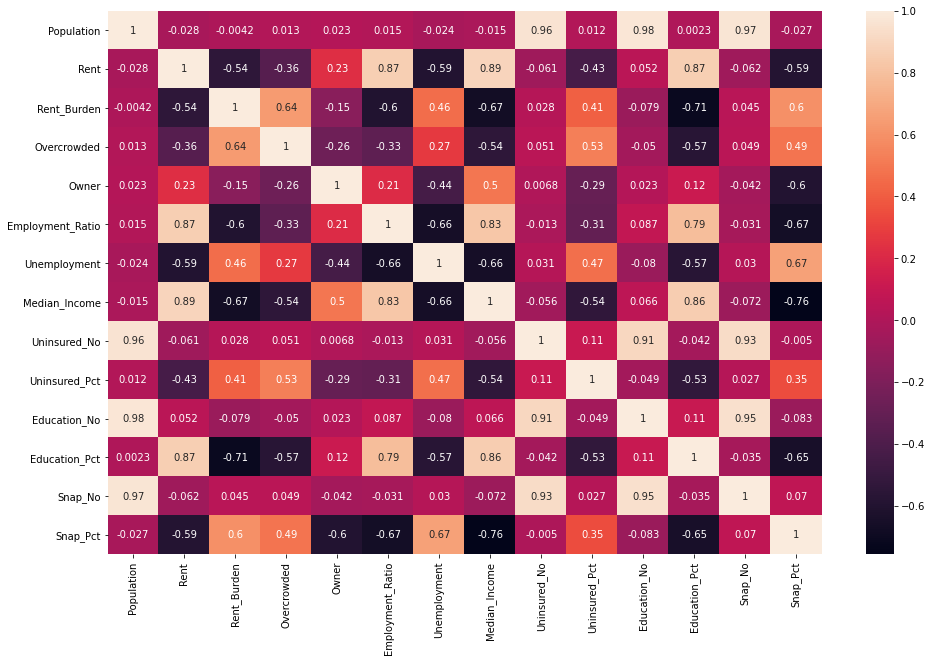

In [36]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = df[df.columns[2:]].corr()
plt.figure(figsize=(16,10))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [37]:
corrMatrix['Population'].sort_values(ascending=False)

Population          1.000000
Education_No        0.977684
Snap_No             0.967826
Uninsured_No        0.959136
Owner               0.023112
Employment_Ratio    0.014694
Overcrowded         0.012800
Uninsured_Pct       0.012022
Education_Pct       0.002289
Rent_Burden        -0.004209
Median_Income      -0.014731
Unemployment       -0.024169
Snap_Pct           -0.027332
Rent               -0.027743
Name: Population, dtype: float64

In [34]:
"""
for col in corrMatrix.columns:
    print(f'{col}:')
    print(corrMatrix[col].sort_values(ascending=False))
    print('\n')
"""

TimeFrame:
TimeFrame           1.000000
Rent                0.252558
Snap_Pct            0.230605
Employment_Ratio    0.128360
Education_Pct       0.118835
Overcrowded         0.089849
Median_Income       0.086204
Rent_Burden         0.076153
Snap_No             0.059436
Education_No        0.031050
Population          0.005660
Fips                0.000000
Owner              -0.017697
Uninsured_No       -0.077778
Unemployment       -0.162025
Uninsured_Pct      -0.511581
Name: TimeFrame, dtype: float64


Fips:
Fips                1.000000
Population          0.916447
Education_No        0.897465
Snap_No             0.886184
Uninsured_No        0.876262
Owner               0.007761
Employment_Ratio    0.006643
Education_Pct       0.004897
Uninsured_Pct       0.004371
TimeFrame           0.000000
Overcrowded        -0.000590
Rent_Burden        -0.008073
Median_Income      -0.011004
Unemployment       -0.012423
Snap_Pct           -0.015240
Rent               -0.023398
Name: Fips, dtype: fl

In [ ]:
"""
median_incomes - 2005-2018
monthly_rent - 2009-2018
arrests - 2000-2019
child_population_by_race_ethnicity - 2005-2018
median_monthly_rent - 2005-2018
home_ownership - 2005-2018
total_population - 2005-2018
child_population - 2005-2018
uninsured - 2008-2018
public_assistance_by_program_type - 2005-2017
unemployment_rate_ - 2005-2018
severe_rent_burden - 2005- 2018
educational_attainment - 2006-2018
overcrowded_rental_housing - 2005-2018
snap_(food_stamps) - 2001-2019
household_income - 2005-2018
public_assistance - 2005-2017
employment_population_ratio - 2005-2018
total_population_by_race_ethnicity - 2009-2018
"""

In [ ]:
#df.to_csv('../data.csv')

In [ ]:
df.columns[1:]

In [22]:
d = df[['TimeFrame','Fips','Population','Rent','Rent_Burden','Overcrowded','Employment_Ratio','Unemployment','Median_Income']].drop_duplicates().dropna()
d.Population = d.Population.round(2)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 910 entries, 0 to 909
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TimeFrame         910 non-null    int64  
 1   Fips              910 non-null    int64  
 2   Location          910 non-null    object 
 3   Population        910 non-null    float64
 4   Rent              910 non-null    float64
 5   Rent_Burden       910 non-null    float64
 6   Overcrowded       908 non-null    float64
 7   Owner             910 non-null    float64
 8   Employment_Ratio  907 non-null    float64
 9   Unemployment      907 non-null    float64
 10  Median_Income     910 non-null    float64
 11  Uninsured_No      715 non-null    float64
 12  Uninsured_Pct     715 non-null    float64
 13  Education_Level   845 non-null    object 
 14  Education_No      845 non-null    float64
 15  Education_Pct     845 non-null    float64
 16  Snap_No           520 non-null    float64
 1

In [ ]:
print(df.Location.value_counts())
print(df.Education_Level.value_counts())
print(df.Income_Level.value_counts())
print(df.Race.value_counts())

In [ ]:
df.describe()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
list(set(df.Income_Level))

In [ ]:
bins=[0.,14999.0,24999.0,34999.0,49999.0,74999.0,99999.0,199999.0,np.inf]
print(bins)

In [ ]:
labels=[
    'Under $15,000',
    '$15,000 to $24,999',
    '$25,000 to $34,999',
    '$35,000 to $49,999',
    '$50,000 to $74,999',
    '$75,000 to $99,999',
    '$100,000 to $199,999',
    '$200,000 or more'
    ]
print(labels)

In [ ]:
pd.cut(df['Median_Income'],bins=bins,labels=labels)

In [ ]:
levels = pd.cut(df['Median_Income'],bins=bins,labels=labels)

levels.hist()
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['Income_Level']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

strat_test_set['Income_Level'].value_counts() / len(strat_test_set)


In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('Income_Level', axis=1, inplace=True)
strat_train_set

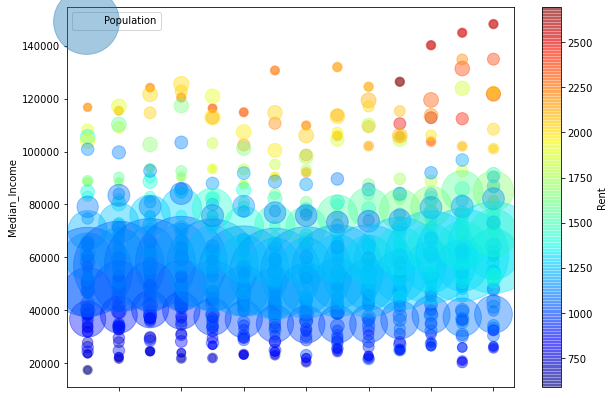

In [39]:
#df2 = strat_train_set.copy()
df.plot(kind='scatter', x='TimeFrame', y='Median_Income', alpha=0.4,
             s=df['Population']/1000, label='Population', figsize=(10,7),
             c='Rent', cmap=plt.get_cmap('jet'), colorbar=True)

plt.legend()

In [ ]:
corr_matrix = df2.corr()

In [ ]:
corr_matrix


In [ ]:
corr_matrix['Rent'].sort_values(ascending=False)

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['Rent', 'Rent_Burden', 'Median_Income', 'Employment_Ratio']

scatter_matrix(df2[attributes], figsize=(12,8))

plt.show()

In [ ]:
df2.plot(kind='scatter', 
              x='Median_Income', 
              y='Rent', 
              alpha=0.01)

plt.show()

In [ ]:
df2 = strat_train_set[['TimeFrame',
           'Fips',
           'Population',
           'Rent_Burden',
           'Median_Income',
           'Employment_Ratio',
           'Unemployment']]
df2_labels = strat_train_set['Rent'].copy()

In [ ]:
print(df2.shape)
df2.head(2)

## Data Cleaning

In [ ]:
# Replacing missing values with the median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
#imputer.fit()
#imputer._statistics_
#X = imputer.transform()
#df_tr = pd.DataFrame(X, columns=df2.columns, index=df.index)

In [ ]:
income_cat = df[['Income_Level']]
income_cat.head(10)

## Categorical Attributes

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
income_cat_encoded = ordinal_encoder.fit_transform(income_cat)
income_cat_encoded[:10]

In [ ]:
ordinal_encoder.categories_

### One-Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
income_cat_1hot = cat_encoder.fit_transform(income_cat)
income_cat_1hot
print(cat_encoder.categories_)
income_cat_1hot.toarray()

In [ ]:
# Assign the data to X and y

X = df2[['Fips','Population','Median_Income']]
y = df2['Rent'].values.reshape(-1, 1)
print(X.shape, y.shape)

In [ ]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape)
print(X_test.shape)

In [ ]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

In [ ]:
# Plot the Residuals for the Training and Testing data
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")


In [ ]:
d.Population